<center>Temp Workaround  last updated 6/1 10:30 pm

#####The following Paragraphs are for a Bluemix workaround. Development is working on this issue so as a workaround we need to determine the correct directories to clean up which are based on the userid so must first determine our id and then use it to find and clean out that directory###

In [34]:
!whoami

s64f-cd88bf3504b094-0e064d06fabc


In [35]:
!ls /gpfs/global_fs01/sym_shared/YPProdSpark/user/s64f-cd88bf3504b094-0e064d06fabc/notebook/notebooks/metastore_db -l

total 24
-rw-r--r-- 1 s64f-cd88bf3504b094-0e064d06fabc users  608 May 12 09:40 README_DO_NOT_TOUCH_FILES.txt
drwxr-xr-x 2 s64f-cd88bf3504b094-0e064d06fabc users 4096 May 12 09:40 log
drwxr-xr-x 2 s64f-cd88bf3504b094-0e064d06fabc users 8192 May 12 09:40 seg0
-rw-r--r-- 1 s64f-cd88bf3504b094-0e064d06fabc users  989 May 12 09:40 service.properties
drwxr-xr-x 2 s64f-cd88bf3504b094-0e064d06fabc users 4096 May 31 12:09 tmp


In [36]:
!rm -rf /gpfs/global_fs01/sym_shared/YPProdSpark/user/s64f-cd88bf3504b094-0e064d06fabc/notebook/notebooks/metastore_db/*.lck

***           End of Bluemix workaround for register_function call      ***

##Install BeautifulSoup

###Beautifulsoup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.You can use it to find:###

    All the links of a website
    All the links whose urls match "foo.com"
    All the table heading that’s got bold text, then give me that text.
    Every "a" element that has an href attribute etc.
    
###### - One time install

In [37]:
!pip install bs4 --user

You are using pip version 7.1.0, however version 8.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


https://en.wikipedia.org/wiki/Data_wrangling



Data wrangling
From Wikipedia, the free encyclopedia

**Data munging** or **data wrangling** is loosely the process of manually converting or mapping data from one "raw" form into another format that allows for more convenient consumption of the data with the help of semi-automated tools. This may include further munging, data visualization, data aggregation, training a statistical model, as well as many other potential uses. Data munging as a process typically follows a set of general steps which begin with extracting the data in a raw form from the data source, "munging" the raw data using algorithms (e.g. sorting) or parsing the data into predefined data structures, and finally depositing the resulting content into a data sink for storage and future use.[1] Given the rapid growth of the internet[2] such techniques will become increasingly important in the organization of the growing amounts of data available.

**A data wrangler** is the person performing the wrangling. In the scientific research context, the term often refers to a person responsible for gathering and organizing disparate data sets collected by many different investigators, often as part of a field campaign. In this sense, the term could be credited to Donald Cline during the NASA/NOAA Cold Lands Processes Experiment.[3] It specifies duties typically handled by a storage administrator for working with large amounts of data. This can occur in areas like major research projects and the making of films with a large amount of complex computer-generated imagery. In research, this involves both data transfer from research instrument to storage grid or storage facility as well as data manipulation for re-analysis via high performance computing instruments or access via cyberinfrastructure-based digital libraries.

The "wrangler" non-technical term is often said to derive from work done by the United States Library of Congress's National Digital Information Infrastructure and Preservation Program (NDIIPP) and their program partner the Emory University Libraries based MetaArchive Partnership. The term "mung" has roots in munging as described in the Jargon File.[4] The term "Data Wrangler" was also suggested as the best analogy to coder for code for someone working with data.[5]

On a film or television production utilizing digital cameras that are not tape based, a data wrangler is employed to manage the transfer of data from a camera to a computer and/or hard drive.


#####<center> ******************** End of Workaround ********************

##Does the Weather impact NFL Football Games? 



<img src="https://raw.githubusercontent.com/bradenrc/nfl_weather/master/presentation/Intro.png" width="30%" height="30%">
<img src="http://upload.wikimedia.org/wikipedia/commons/e/ea/Spark-logo-192x100px.png" width="10%" height="10%">

#Background Analyze NFL and Weather data 

Assume the persona of Data Engineer and prepare data for the Data Analyst or the Data Scientist. 
The data will be prepared for use by the notebook in the form of JSON files on IBM Bluemix Object Storage.

The Analysis assumes the persona of the Data Analyst or Data Scientist. This notebook will use the data wrangled from the first notebook JSON files stored on IBM Bluemix Object Storage.

Only two prerequisites are that you :

    Must have IBM ID to logon to Bluemix
    Must have previously provsioned and tested access to swift storage (Bluemix Object Store)


##Data Engineering Persona:## 
Enable data scientists to do their jobs more effectively! <BR>
Our definition of data engineering includes what some companies might call Data Infrastructure or Data Architecture. <BR>
The data engineer gathers and collects the data, stores it, does batch processing or real-time processing on it, 
and serves it via an API to a data scientist who can easily query it. 


## Building a Dataframe from a Relational  Data Source using JDBC #1 ##

This is an example of creating a connection to DashDB on Bluemix, leverage JDBC to load a spark data frame from the games table stored in dashdb"DASH019163".

dashDB tables used in this notebook
  - DASH019163.PLAYER
  - DASH019163.TEAM
  - DASH019163.GAME
  
Some will be loaded with data that originated from the NFL Database (NFLDB)


In [38]:
## Patience as this can take a few minutes to build a data frame from games tables stored in dashdb
game_df = sqlContext.read.format('jdbc').options(url='jdbc:db2://bluemix05.bluforcloud.com:50000/BLUDB', dbtable='DASH019163.GAME', user='dash019163', password='p9lF04HeD7ZQ').load()


## Multiple Validation Techniques 



In [39]:
## technique 1 take a few rows
game_df.take(2)
##game_df.first()


[Row(GSIS_ID=2013120807, GAMEKEY=56037, START_TIME=datetime.datetime(2013, 12, 8, 10, 0), WEEK=14, DAY_OF_WEEK=u'Sunday', SEASON_YEAR=2013, SEASON_TYPE=u'Regular', FINISHED=u't', HOME_TEAM=u'TB', HOME_SCORE=27, HOME_SCORE_Q1=14, HOME_SCORE_Q2=10, HOME_SCORE_Q3=3, HOME_SCORE_Q4=0, HOME_SCORE_Q5=0, HOME_TURNOVERS=0, AWAY_TEAM=u'BUF', AWAY_SCORE=6, AWAY_SCORE_Q1=3, AWAY_SCORE_Q2=0, AWAY_SCORE_Q3=3, AWAY_SCORE_Q4=0, AWAY_SCORE_Q5=0, AWAY_TURNOVERS=3, TIME_INSERTED=datetime.datetime(2013, 9, 3, 22, 36, 23, 420121), TIME_UPDATED=datetime.datetime(2014, 11, 26, 16, 45, 36, 346334)),
 Row(GSIS_ID=2013120808, GAMEKEY=56038, START_TIME=datetime.datetime(2013, 12, 8, 10, 0), WEEK=14, DAY_OF_WEEK=u'Sunday', SEASON_YEAR=2013, SEASON_TYPE=u'Regular', FINISHED=u't', HOME_TEAM=u'WAS', HOME_SCORE=10, HOME_SCORE_Q1=0, HOME_SCORE_Q2=10, HOME_SCORE_Q3=0, HOME_SCORE_Q4=0, HOME_SCORE_Q5=0, HOME_TURNOVERS=3, AWAY_TEAM=u'KC', AWAY_SCORE=45, AWAY_SCORE_Q1=17, AWAY_SCORE_Q2=21, AWAY_SCORE_Q3=0, AWAY_SCORE_Q4=7,

In [40]:
## technique 2 for wide frames use a loop and separators 
for s in game_df.take(2):
    print s
    print "*" * 20 + ' Game Frame ' + "*" * 20 

Row(GSIS_ID=2013120807, GAMEKEY=56037, START_TIME=datetime.datetime(2013, 12, 8, 10, 0), WEEK=14, DAY_OF_WEEK=u'Sunday', SEASON_YEAR=2013, SEASON_TYPE=u'Regular', FINISHED=u't', HOME_TEAM=u'TB', HOME_SCORE=27, HOME_SCORE_Q1=14, HOME_SCORE_Q2=10, HOME_SCORE_Q3=3, HOME_SCORE_Q4=0, HOME_SCORE_Q5=0, HOME_TURNOVERS=0, AWAY_TEAM=u'BUF', AWAY_SCORE=6, AWAY_SCORE_Q1=3, AWAY_SCORE_Q2=0, AWAY_SCORE_Q3=3, AWAY_SCORE_Q4=0, AWAY_SCORE_Q5=0, AWAY_TURNOVERS=3, TIME_INSERTED=datetime.datetime(2013, 9, 3, 22, 36, 23, 420121), TIME_UPDATED=datetime.datetime(2014, 11, 26, 16, 45, 36, 346334))
******************** Game Frame ********************
Row(GSIS_ID=2013120808, GAMEKEY=56038, START_TIME=datetime.datetime(2013, 12, 8, 10, 0), WEEK=14, DAY_OF_WEEK=u'Sunday', SEASON_YEAR=2013, SEASON_TYPE=u'Regular', FINISHED=u't', HOME_TEAM=u'WAS', HOME_SCORE=10, HOME_SCORE_Q1=0, HOME_SCORE_Q2=10, HOME_SCORE_Q3=0, HOME_SCORE_Q4=0, HOME_SCORE_Q5=0, HOME_TURNOVERS=3, AWAY_TEAM=u'KC', AWAY_SCORE=45, AWAY_SCORE_Q1=17, A

#Building three data frames one (players,games, team) 

##Register Data Frame as a temp table to enable spark sql access

We begin to build our data sources. by creating a Spark SQLContext Temporary Table(game) from dashDB. The Temp Table will be used in SQL queries later in this notebook <br>

Note: Temporary Tables do not persist across clusters and cluster restarts. temp tables are also pointers to the data frame

# Use a temp table (actually a pointer to df) 

In [41]:
game_df.registerTempTable("game")


In [42]:
query = """
select * from game
"""
game_pd = sqlContext.sql(query)

In [43]:
query = """
CREATE TEMPORARY TABLE player
USING org.apache.spark.sql.jdbc
OPTIONS (
   url 'jdbc:db2://bluemix05.bluforcloud.com:50000/BLUDB', 
  dbtable 'DASH019163.PLAYER', 
  user 'dash019163', 
  password 'p9lF04HeD7ZQ'
)
"""
player_df = sqlContext.sql(query)

In [44]:
# validate to be sure the table is empty
player_df.take(2)

[]

##Populate the player data frame and table ##

Use SQL to populate a new Pandas DataFrame(player_pd). We will wrangle the data from TempTable(player) in order to prepare the Pandas DataFrame(player_pd) to be processed by the next paragraph,

The creation of a DataFrame is a Tranformations. <br>
Transformations are a lazy evaluation. i.e. player_pd = sqlContext.sql(query).toPandas()<br>
a tranformations does not get created or populated until an ACTION in the next paragraph - **ACTION** = *player_pd.plot(kind='bar', x='COLLEGE', figsize=(12, 5))*

Pandas is a software library written for the Python programming language for data manipulation and analysis In particular, it offers data structures and operations for<br> manipulating numerical tables and time series.<br>
Use Pandas with Plotly's Python package to make interactive graphs directly from data frames. Generate line charts, bar charts, histograms, box plots, and more. 

##Query to Count Players by School and Validate with Pandas##



In [45]:
query = """
select
 COLLEGE,
 count(*) as COUNT
from
 player
where
 COLLEGE is not null
group by
 COLLEGE
order by count(*) desc
limit 20
"""
 
sqlContext.sql(query).toPandas()


,COLLEGE,COUNT
0,Miami (Fla.),112
1,LSU,109
2,USC,106
3,Ohio State,103
4,Florida,100
5,Georgia,98
6,Florida State,94
7,Oklahoma,94
8,Alabama,87
9,Texas,85


## Import and Use Libraries matplotlib and numpy 
- matplotlib is a python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.
- NumPy is the fundamental package for scientific computing with Python. It contains among other things:
     A powerful N-dimensional array object
     Sophisticated (broadcasting) functions
     Tools for integrating C/C++ and Fortran code
     Useful linear algebra, Fourier transform, and random number capabilities <bf>
     
- Create plot chart using Pandas DataFrame(player_pd)
     - What is the most common Collage for drafting NFL players
     
We will use the Pandas DataFrame(player_pd) which was wrangled in the previous paragraph and contains data about what collage the players attended. Using this Pandas DataFrame and matplotlib, we display a BAR Plot which show the common college the player attened. 

Note - The query is limiting to 20 rows of data. You can modify this if desired

In [46]:
%matplotlib inline 
import matplotlib.pyplot as plt, numpy as np

player_pd.plot(kind='bar', x='COLLEGE', figsize=(12, 5))

NameError: name 'player_pd' is not defined

This query will be used to create DataFrame(games_norm_df) in a following paragraph. The goal here is to get the data in the format desired to be used through out this notebook

In [47]:
query = """

SELECT GSIS_ID
       , GAMEKEY
       , START_TIME
       , WEEK
       , DAY_OF_WEEK
       , SEASON_YEAR
       , SEASON_TYPE
       , FINISHED
	   , HOME_TEAM as LOCATION
	   , 1 as HOME_GAME
       , HOME_TEAM as TEAM
       , HOME_SCORE as SCORE
       , HOME_SCORE_Q1 as SCORE_Q1
       , HOME_SCORE_Q2 as SCORE_Q2
       , HOME_SCORE_Q3 as SCORE_Q3
       , HOME_SCORE_Q4 as SCORE_Q4
       , HOME_SCORE_Q5 as SCORE_Q5
       , HOME_TURNOVERS as TURNOVERS
	   , AWAY_TEAM as OPPONENT_TEAM
       , AWAY_SCORE as OPPONENT_SCORE
       , AWAY_SCORE_Q1 as OPPONENT_SCORE_Q1
       , AWAY_SCORE_Q2 as OPPONENT_SCORE_Q2
       , AWAY_SCORE_Q3 as OPPONENT_SCORE_Q3
       , AWAY_SCORE_Q4 as OPPONENT_SCORE_Q4
       , AWAY_SCORE_Q5 as OPPONENT_SCORE_Q5
       , AWAY_TURNOVERS as OPPONENT_TURNOVERS
	   ,CASE 
	   		WHEN HOME_SCORE > AWAY_SCORE then 1
			WHEN HOME_SCORE < AWAY_SCORE then 0
		END as  WON
		,CASE 
	   		WHEN HOME_SCORE = AWAY_SCORE then 1
			WHEN HOME_SCORE != AWAY_SCORE then 0
		END as  TIE
  FROM game
  UNION ALL
  SELECT GSIS_ID
       , GAMEKEY
       , START_TIME
       , WEEK
       , DAY_OF_WEEK
       , SEASON_YEAR
       , SEASON_TYPE
       , FINISHED
       , HOME_TEAM as LOCATION
	   , 0 as HOME_GAME
       , AWAY_TEAM as TEAM
       , AWAY_SCORE as SCORE
       , AWAY_SCORE_Q1 as SCORE_Q1
       , AWAY_SCORE_Q2 as SCORE_Q2
       , AWAY_SCORE_Q3 as SCORE_Q3
       , AWAY_SCORE_Q4 as SCORE_Q4
       , AWAY_SCORE_Q5 as SCORE_Q5
       , AWAY_TURNOVERS as TURNOVERS
	   , HOME_TEAM as OPPONENT_TEAM
       , HOME_SCORE as OPPONENT_SCORE
       , HOME_SCORE_Q1 as OPPONENT_SCORE_Q1
       , HOME_SCORE_Q2 as OPPONENT_SCORE_Q2
       , HOME_SCORE_Q3 as OPPONENT_SCORE_Q3
       , HOME_SCORE_Q4 as OPPONENT_SCORE_Q4
       , HOME_SCORE_Q5 as OPPONENT_SCORE_Q5
       , HOME_TURNOVERS as OPPONENT_TURNOVERS
	   ,CASE 
	   		WHEN AWAY_SCORE > HOME_SCORE then 1
			WHEN AWAY_SCORE < HOME_SCORE then 0
		END as  WON
		,CASE 
	   		WHEN HOME_SCORE = AWAY_SCORE then 1
			WHEN HOME_SCORE != AWAY_SCORE then 0
		END as  TIE
  FROM game
"""
sqlContext.sql(query).toPandas()


,GSIS_ID,GAMEKEY,START_TIME,WEEK,DAY_OF_WEEK,SEASON_YEAR,SEASON_TYPE,FINISHED,LOCATION,HOME_GAME,...,OPPONENT_TEAM,OPPONENT_SCORE,OPPONENT_SCORE_Q1,OPPONENT_SCORE_Q2,OPPONENT_SCORE_Q3,OPPONENT_SCORE_Q4,OPPONENT_SCORE_Q5,OPPONENT_TURNOVERS,WON,TIE
0,2013120807,56037,2013-12-08 10:00:00,14,Sunday,2013,Regular,t,TB,1,...,BUF,6,3,0,3,0,0,3,1,0
1,2013120808,56038,2013-12-08 10:00:00,14,Sunday,2013,Regular,t,WAS,1,...,KC,45,17,21,0,7,0,3,0,0
2,2013120809,56039,2013-12-08 13:05:00,14,Sunday,2013,Regular,t,DEN,1,...,TEN,28,14,7,7,0,0,3,1,0
3,2013120810,56040,2013-12-08 13:25:00,14,Sunday,2013,Regular,t,ARI,1,...,STL,10,3,0,0,7,0,0,1,0
4,2013120811,56041,2013-12-08 13:25:00,14,Sunday,2013,Regular,t,SD,1,...,NYG,14,0,0,7,7,0,0,1,0
5,2013120813,56043,2013-12-08 10:00:00,14,Sunday,2013,Regular,t,GB,1,...,ATL,21,0,21,0,0,0,0,1,0
6,2013120900,56044,2013-12-09 17:40:00,14,Monday,2013,Regular,t,CHI,1,...,DAL,28,7,7,0,14,0,2,1,0
7,2013121200,56045,2013-12-12 17:25:00,15,Thursday,2013,Regular,t,DEN,1,...,SD,27,3,14,7,3,0,0,0,0
8,2013121500,56046,2013-12-15 10:00:00,15,Sunday,2013,Regular,t,ATL,1,...,WAS,26,7,13,0,6,0,1,1,0
9,2013121501,56047,2013-12-15 10:00:00,15,Sunday,2013,Regular,t,CLE,1,...,CHI,38,0,10,7,21,0,1,0,0


In [48]:
games_norm_df = sqlContext.sql(query)
games_norm_df.registerTempTable("game_normalized")

##The next paragraph prints the schema for DataFrame "games_norm_df"

We will display the Schema for the DataFrame(games_norm_df). Notice that this shows the Column Name, Data Type and if nullable

In [49]:
games_norm_df.printSchema() 

root
 |-- GSIS_ID: integer (nullable = false)
 |-- GAMEKEY: integer (nullable = false)
 |-- START_TIME: timestamp (nullable = false)
 |-- WEEK: integer (nullable = false)
 |-- DAY_OF_WEEK: string (nullable = false)
 |-- SEASON_YEAR: integer (nullable = false)
 |-- SEASON_TYPE: string (nullable = false)
 |-- FINISHED: string (nullable = false)
 |-- LOCATION: string (nullable = false)
 |-- HOME_GAME: integer (nullable = false)
 |-- TEAM: string (nullable = false)
 |-- SCORE: integer (nullable = false)
 |-- SCORE_Q1: integer (nullable = false)
 |-- SCORE_Q2: integer (nullable = false)
 |-- SCORE_Q3: integer (nullable = false)
 |-- SCORE_Q4: integer (nullable = false)
 |-- SCORE_Q5: integer (nullable = false)
 |-- TURNOVERS: integer (nullable = false)
 |-- OPPONENT_TEAM: string (nullable = false)
 |-- OPPONENT_SCORE: integer (nullable = false)
 |-- OPPONENT_SCORE_Q1: integer (nullable = false)
 |-- OPPONENT_SCORE_Q2: integer (nullable = false)
 |-- OPPONENT_SCORE_Q3: integer (nullable = fa

## Use a SQL query to create a new DataFrame(pd) 

##Summarizing the number of wins for each team and ploting accordingly 

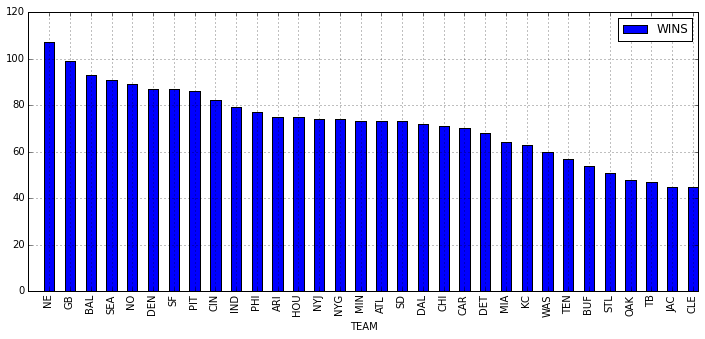

In [50]:
## very slow process to complete 
query = """
select
    sum(WON) as WINS,
    TEAM
FROM
    game_normalized
GROUP BY
    TEAM
ORDER BY WINS desc
"""
pd = sqlContext.sql(query).toPandas()
pd.plot(kind='bar', x='TEAM', figsize=(12, 5))

##Another example connecting to dashDB on Bluemix.  
- We are **loading** a DataFrame(team_df) from a dashDB table "TEAM" in the schema "DASH019163".
- Creating a Temporary Table in the SQLContext (team)

We continue to build our data sources.<br>
Here we connect to dashDB again to access table "TEAM". We will then create another TempTable within the Spark sqlContext and this TempTable will be used in SQL queries later in this notebook. 

In [51]:
team_df = sqlContext.read.format('jdbc').options(url='jdbc:db2://bluemix05.bluforcloud.com:50000/BLUDB', dbtable='DASH019163.TEAM', user='dash019163', password='p9lF04HeD7ZQ').load()
team_df.registerTempTable("team")

##The next paragraph will :##
- Import urllib: which allows you access websites via your program.
- Inport-Beautiful Soup is a Python library for pulling data out of HTML and XML files
- Import re: which provides regular expression matching operations.
- Define a Python function: clean_string(cstring) using (regx) to clean up the data (strstr)
- Create type=list(stadiums_l) with values for [team, location, stadium]
- Print list(stadiums_l) indices 1 and 2 (notice begining offset is 0  
(clean non-ascii from wiki page)
   
This paragraph is a bit more busy.  We are going to define a function(clean_string) that will be used to clean up the data. This function will use Regx to wrangle the data and populate into a List(stadiums_l) The List will have vlaues for (team, location, stadium). The final part of the paragraph is printing the data in the List for List index(0) and List index(1) 

The list is a most versatile datatype available in Python which can be written as a list of comma-separated values (items) between square brackets. Important thing about a list is that items in a list need not be of the same type.

In [52]:
##
## open this url to illustrate 
##
import urllib
from bs4 import BeautifulSoup
import re


url = "https://en.wikipedia.org/wiki/National_Football_League"

html = urllib.urlopen(url)
bsObj = BeautifulSoup(html, "html.parser")

table = bsObj.find("table", {"class": "navbox plainrowheaders wikitable"})
rows = table.findAll("tr")


def clean_string(cstring):

    st = cstring.replace("*", "")
    st = re.sub(r'[^\x00-\x7F]+',' ', st)

    if st.__contains__("["):
        return st[0:st.index("[")]
    else:
        return st


stadiums_l = []

for row in rows:
    r = []
    for cell in row.findAll(['td', 'th']):
        r.append(cell.get_text())

        if len(r) == 7 and r[0] not in ["North", "South", "East", "West", "Division[52]"]:
            team = clean_string(r[0])
            location = clean_string(r[1])
            stadium = clean_string(r[2])
            stadiums_l.append([team, location, stadium])

        if len(r) == 8 and r[1] not in ["Club[52]"]:
            team = clean_string(r[1])
            location = r[2]
            stadium = r[3]
            stadiums_l.append([team, location, stadium])

print stadiums_l[0]
print stadiums_l[1]

[u'Buffalo Bills', u'Orchard Park, NY', u'Ralph Wilson Stadium']
[u'Miami Dolphins', u'Miami Gardens, FL', u'New Miami Stadium']


##- import Spark SQL and DataFrames classes:
- pyspark.sql.Row A row of data in a DataFrame.
- map. - create DataFrame(stadiums_df) and define column names.
- Parallelize - Creates a new DataFrame (stadiums_df) using lambda (anonymous function)
- Registers the Temporary Table "stadiums" in the SQLContext. 
- Print first 2 rows in DataFrame(stadiums_df)using for loop (format text)

We are using Spark SQL Class(Row) from Spark sqlContext. The Row Class provides the ability to access a row in a DataFrame. We will create a new Spark RDD(stadiums_rdd) and parallelize the data from the List(stadiums_l). Now we have an RDD and will use .map function to create a DataFrame(stadiums_df) and .map will create the column names in the DataFrame (team, stadium_city, stadium_name). We then Register a new TempTable(stadiums) to be used in following paragraphs. Finally we print the DataFrame(stadiums_df) using a for loop to better format the output.   

**Lambda Function** <br>
Python supports the creation of anonymous functions (i.e. functions that are not bound to a name) at runtime, using a construct called "lambda". This is not exactly the same as lambda in functional programming languages, but it is a very powerful concept that's well integrated into Python and is often used in conjunction with typical functional concepts like filter(), map() and reduce(). 



In [53]:
from pyspark.sql import Row

stadiums_rdd = sc.parallelize(stadiums_l)
stadiums_df = stadiums_rdd.map(lambda x: Row(team=x[0], stadium_city=x[1], stadium_name=x[2])).toDF()
stadiums_df.registerTempTable("stadiums")

## quick validation

for s in stadiums_df.take(2):
    print s

Row(stadium_city=u'Orchard Park, NY', stadium_name=u'Ralph Wilson Stadium', team=u'Buffalo Bills')
Row(stadium_city=u'Miami Gardens, FL', stadium_name=u'New Miami Stadium', team=u'Miami Dolphins')


##Validate with a simple select * from TempTable(stadiums) that was created in the previously

In [54]:
sqlContext.sql("select * from stadiums").toPandas()

,stadium_city,stadium_name,team
0,"Orchard Park, NY",Ralph Wilson Stadium,Buffalo Bills
1,"Miami Gardens, FL",New Miami Stadium,Miami Dolphins
2,"Foxborough, MA",Gillette Stadium,New England Patriots
3,"East Rutherford, NJ",MetLife Stadium,New York Jets
4,"Baltimore, MD",M&T Bank Stadium,Baltimore Ravens
5,"Cincinnati, OH",Paul Brown Stadium,Cincinnati Bengals
6,"Cleveland, OH",FirstEnergy Stadium,Cleveland Browns
7,"Pittsburgh, PA",Heinz Field,Pittsburgh Steelers
8,"Houston, TX",NRG Stadium,Houston Texans
9,"Indianapolis, IN",Lucas Oil Stadium,Indianapolis Colts


#User Defined Function(match_strings_fuzzy)  Overview
- This will be used to fuzzy match str1 and str2 
- Registers a Function as a UDF(match_strings_fuzzy) so it can be used in SQL statements

We define a funciton(match_strings_fuzzy) that will be used in following paragraphs. This function will match team names. 

fuzzy match is true if any value of str1 is in str2. <br>
  **example1 :** <br>
  str1 = ['a','b','c']<br>
  str2 = ['a','b','c','d','e']<br>
  match_strings_fuzzy(str1, str2) = True. a,b,c are all in str2<br>
  
  **example2 :**<br>
  str1 = ['a','b','c']<br>
  str2 = ['d','e','f','g','h']<br>
  match_strings_fuzzy(str1, str2) = False. not any of the values in str1 are in str2<br>
  
  

In [55]:
##UDF
def match_strings_fuzzy(str1, str2):
    return str1.lower() in str2.lower()

sqlContext.registerFunction("match_strings_fuzzy", match_strings_fuzzy)


##Loop and build a list of locations (locations_d) with team and stadium_city. 

- function(match_city_team) is called, it will loop through list(locations_d) to match locations_d.team to team_df.NAME Why all we had is team names and need location to look up the weather
- Call function(match_city_team) using "Bills" and "Giants" and print the cities associated with each. 

We will create another List(locations_d) by looping through DataFrame(stadiums_df) and appending/adding team and stadium to the List(locations_d). We will also define another function(match_city_team) that will use team as input into List(locations_d) and return x(stadium_city). Finally we will print x(stadium_city) for "Bills" and Giants". 

In [56]:
locations_d = []

for l in stadiums_df.collect():
    locations_d.append([l.team ,l.stadium_city])

def match_city_team(team):
    for x in locations_d:
        if team in x[0]:
            return x[1]
        
print match_city_team("Bills")
print match_city_team("Giants")

Orchard Park, NY
East Rutherford, NJ


##Using .map with a lambda function and the function(match_city_team) print the city(location_d) for the first 2 entities from previous defined DataFrame(team_df) 

We will pint the first 5 rows from DataFrame(team_df). Input to the Function(match_city_team) is the NAME column from DataFrame(team_df). The Function will return the stadium_city from the List(location_d) if a match is found with team_df.NAME = location_d.team


Schema for DataFrame(team_df)
DataFrame(team_df)
root
 |-- TEAM_ID: string (nullable = false)
 |-- CITY: string (nullable = false)
 |-- NAME: string (nullable = false)

In [57]:
team_df.map(lambda x: match_city_team(x.NAME)).take(2)

[u'Glendale, AZ', u'Atlanta, GA']

##The next paragraph will do the following:##
- import Spark SQL and DataFrames classes:
- pyspark.sql.Row A row of data in a DataFrame.
- map. and lambda will get all rows(x) from DataFrame(team_df)   
- The asDict function will provide the ability to create a Dictionary and inherit all of the metadata from DataFrame(team_df) 
- Plus add an additional column name of "location" and populate with NAME value using the function(match_city_team)
- The value of (sequential value) x will be the key for the Dictionary
- Create a new DataFrame(team_loc_df) with the additional column "location"
- Create a Temporary Table in the SQLContext (team_loc)

This paragraph may be a bit confusing. let me try to explain:<br>
the goal here is to create a DataFrame(team_loc_df) with all of the existing columns from DataFrame(team_df) and 1 additional column of "location". DataFrames are immutable so we can not just add a column to the existing DataFrame(team_df). We need to create a new DataFrame with the additional column "location". We also want to populate the column "location" with the correct value. 

_.map will map each **row** of data from DataFrame(team_df) to the new DataFrame(team_loc_df).

__**dict(x.asDict()__ this will build a type = Dictionary. A Python Dictionary uses a key-value pairs. This provides the ability to ingest the extisting DataFrame(team_df) with the column names, add the additional column name "location" and then create the new DataFrame(team_loc_df). The Function(match_city_team) provide the correct value for the column "location"    

__team_loc_df = team_df.map(lambda x: Row(**dict(x.asDict(), location=match_city_team(x.NAME)))).toDF()__

In order to get the correct value we will use our previously defined Function(match_city_team) which will match the column "NAME" to the List(locations_d.team) to return List(locations_d.stadium_city) 

DataFrame(team_df)<br>
root<br>
 |-- TEAM_ID: string (nullable = false)<br>
 |-- CITY: string (nullable = false)<br>
 |-- NAME: string (nullable = false)<br>
 
DataFrame(team_loc_df)<br>
root<br>
 |-- CITY: string (nullable = true)<br>
 |-- NAME: string (nullable = true)<br>
 |-- TEAM_ID: string (nullable = true)<br>
 |-- location: string (nullable = true)<br>


In [58]:
from pyspark.sql import Row

team_loc_df = team_df.map(lambda x: Row(**dict(x.asDict(), location=match_city_team(x.NAME)))).toDF()
team_loc_df.registerTempTable("team_loc")

##Validate with a quick Query:##
- Select all rows from temp table(team_loc) using Pandas library to format data

In [59]:
sqlContext.sql("select * from team_loc").toPandas()

,CITY,NAME,TEAM_ID,location
0,Arizona,Cardinals,ARI,"Glendale, AZ"
1,Atlanta,Falcons,ATL,"Atlanta, GA"
2,Baltimore,Ravens,BAL,"Baltimore, MD"
3,Buffalo,Bills,BUF,"Orchard Park, NY"
4,Carolina,Panthers,CAR,"Charlotte, NC"
5,Chicago,Bears,CHI,"Chicago, IL"
6,Cincinnati,Bengals,CIN,"Cincinnati, OH"
7,Cleveland,Browns,CLE,"Cleveland, OH"
8,Dallas,Cowboys,DAL,"Arlington, TX"
9,Denver,Broncos,DEN,"Denver, CO"


##Creates a "query" which contains the SQL to use UDF(match_strings_fuzzy)
- This will fuzzy match Temp Table=team, Column=NAME to Temp Table=stadiums, Column=team 
- Executes the SQL defined in the variable "query" to populate the DataFrame.
- Registers the Temporary Table "team_locations" in the SQLContext. 
- Create a Pandas DataFrame(team_locations_df) 

We are building the SQL that will select the data from TempTables "team" and "stadiums" in order to create a new DataFrame(team_locations_df). We want to only select the rows where function(match_strings_fuzzy) is true. The Function(match_strings_fuzzy) was described previously.
DataFrame = team_df<br>
Temp Table = team<br>
root<br>
 |-- TEAM_ID: string (nullable = false)<br>
 |-- CITY: string (nullable = false)<br>
 |-- NAME: string (nullable = false)<br>

DataFrame = stadiums_df<br>
Temp Table = stadiums<br>
root<br>
 |-- stadium_city: string (nullable = true)<br>
 |-- stadium_name: string (nullable = true)<br>
 |-- team: string (nullable = true)<br>


StrSTR (String within String)


In [60]:
query = """
select
    lower(CITY + NAME),
    TEAM_ID,
    CITY,
    NAME,
    stadium_city,
    stadium_name,
    team,
    match_strings_fuzzy(NAME, team)
from
    team, stadiums
where
    match_strings_fuzzy(NAME, team) = 'true'
"""

team_locations_df = sqlContext.sql(query)
team_locations_df.registerTempTable("team_locations")
team_locations_df.toPandas()

,_c0,TEAM_ID,CITY,NAME,stadium_city,stadium_name,team,_c7
0,None,BUF,Buffalo,Bills,"Orchard Park, NY",Ralph Wilson Stadium,Buffalo Bills,true
1,None,MIA,Miami,Dolphins,"Miami Gardens, FL",New Miami Stadium,Miami Dolphins,true
2,None,NE,New England,Patriots,"Foxborough, MA",Gillette Stadium,New England Patriots,true
3,None,BAL,Baltimore,Ravens,"Baltimore, MD",M&T Bank Stadium,Baltimore Ravens,true
4,None,CIN,Cincinnati,Bengals,"Cincinnati, OH",Paul Brown Stadium,Cincinnati Bengals,true
5,None,NYJ,New York,Jets,"East Rutherford, NJ",MetLife Stadium,New York Jets,true
6,None,CLE,Cleveland,Browns,"Cleveland, OH",FirstEnergy Stadium,Cleveland Browns,true
7,None,HOU,Houston,Texans,"Houston, TX",NRG Stadium,Houston Texans,true
8,None,PIT,Pittsburgh,Steelers,"Pittsburgh, PA",Heinz Field,Pittsburgh Steelers,true
9,None,IND,Indianapolis,Colts,"Indianapolis, IN",Lucas Oil Stadium,Indianapolis Colts,true


##Join data from Temp Table team_loc with Temp Table game_normalized (game_normalized.LOCATION = team_loc.TEAM_ID)
- Display data using Pandas library to format data

We are simply showing how to join 2 tables using an inner join. 

DataFrame = team_loc_df<br>
Temp Table = team_loc<br>
root<br>
 |-- CITY: string (nullable = true)<br>
 |-- NAME: string (nullable = true)<br>
 |-- TEAM_ID: string (nullable = true)<br>
 |-- location: string (nullable = true)<br>

DataFrame = game_norm_df<br>
Temp Table = game_normalized<br>
root<br>
 |-- GSIS_ID: integer (nullable = false)<br>
 |-- GAMEKEY: integer (nullable = false)<br>
 |-- START_TIME: timestamp (nullable = false)<br>
 |-- WEEK: integer (nullable = false)<br>
 |-- DAY_OF_WEEK: string (nullable = false)<br>
 |-- SEASON_YEAR: integer (nullable = false)<br>
 |-- SEASON_TYPE: string (nullable = false)<br>
 |-- FINISHED: string (nullable = false)<br>
 |-- LOCATION: string (nullable = false)<br>
 |-- HOME_GAME: integer (nullable = false)<br>
 |-- TEAM: string (nullable = false)<br>
 |-- SCORE: integer (nullable = false)<br>
 |-- SCORE_Q1: integer (nullable = false)<br>
 |-- SCORE_Q2: integer (nullable = false)<br>
 |-- SCORE_Q3: integer (nullable = false)<br>
 |-- SCORE_Q4: integer (nullable = false)<br>
 |-- SCORE_Q5: integer (nullable = false)<br>
 |-- TURNOVERS: integer (nullable = false)<br>
 |-- OPPONENT_TEAM: string (nullable = false)<br>
 |-- OPPONENT_SCORE: integer (nullable = false)<br>
 |-- OPPONENT_SCORE_Q1: integer (nullable = false)<br>
 |-- OPPONENT_SCORE_Q2: integer (nullable = false)<br>
 |-- OPPONENT_SCORE_Q3: integer (nullable = false)<br>
 |-- OPPONENT_SCORE_Q4: integer (nullable = false)<br>
 |-- OPPONENT_SCORE_Q5: integer (nullable = false)<br>
 |-- OPPONENT_TURNOVERS: integer (nullable = false)<br>
 |-- WON: integer (nullable = true)<br>
 |-- TIE: integer (nullable = true)<br>


In [61]:
query = """
select
    DISTINCT
    GSIS_ID,
    START_TIME,
    team_loc.location as stadium_city,
    game_normalized.LOCATION
from
    game_normalized 
inner join team_loc on
     game_normalized.LOCATION = team_loc.TEAM_ID
limit 10
"""
sqlContext.sql(query).toPandas()

,GSIS_ID,START_TIME,stadium_city,LOCATION
0,2014122107,2014-12-21 10:00:00,"Tampa, FL",TB
1,2015111502,2015-11-15 10:00:00,"Tampa, FL",TB
2,2015091311,2015-09-13 13:25:00,"Tampa, FL",TB
3,2015082451,2015-08-24 17:00:00,"Tampa, FL",TB
4,2015120608,2015-12-06 10:00:00,"Tampa, FL",TB
5,2015121308,2015-12-13 10:00:00,"Tampa, FL",TB
6,2009092708,2009-09-27 10:00:00,"Tampa, FL",TB
7,2015122708,2015-12-27 10:00:00,"Tampa, FL",TB
8,2009101806,2009-10-18 10:00:00,"Tampa, FL",TB
9,2015101104,2015-10-11 10:00:00,"Tampa, FL",TB


##The next paragraph will do the following:##

- Creates a variable named "query" which contains SQL text
- Create a new DataFrame(distinct_games_df)
- Executes SQL(query) 
- Select Distinct data from from Temp Table team_loc with Temp Table game_normalized 
- preform an inner join on game_normalized.LOCATION = team_loc.TEAM_ID
- Registers the Temporary Table "distinct_games" in the SQLContext. 
- Prints the count in DataFrame(distinct_games_df)

We are building the SQL text in variable "query". We then use that SQL to populate a new DataFrame(distinct_games_df) and then register a TempTable(distinct_games) and print the count.

In [62]:
query = """
select
    DISTINCT
    GSIS_ID,
    START_TIME,
    team_loc.location as stadium_city,
    game_normalized.LOCATION
from
    game_normalized 
inner join team_loc on
     game_normalized.LOCATION = team_loc.TEAM_ID
"""
distinct_games_df = sqlContext.sql(query)
distinct_games_df.registerTempTable("distinct_games")
print distinct_games_df.count()

2316


##The next paragraph will do the following:##
- Import datetime:
- The datetime module supplies classes for manipulating dates and times in both simple and complex ways.
- Inport os
- This module provides a portable way of using operating system dependent functionality.
- api_key - Required to access Weather Underground
- Weather Underground provides local & long range Weather Forecast, weather reports, maps & tropical weather conditions for locations worldwide.
- Define function(lead_zero) to clean up data 
- Define function(weather_uri) - function to build the URI that calls the weather underground API 
- Define UDF(weather_uri)- Registers a function as a UDF so it can be used in SQL statements

We are importing datetime and os module. We then define a variable "api_key" which is used to access Weather Underground url. Also define 2 Functions. the first Function(lead_zero) which adds leding zero to the dates for the API usage. The second Function(weather_uri) using location and game_day as input and returns the link for the JSON file on the Weather Underground web site.  

In [63]:
import datetime
import os

api_key = "9ea2f24ba4e99c50"

#add a leading zero to the dates for the API
# ????
def lead_zero(value):
    if int(value) in range(1,10):
        return str(0) + str(value)
    else:
        return value

#function to build the URI that calls the weather underground API    
def weather_uri(location, game_day):

    base_uri = "http://api.wunderground.com/api/{}/history_".format(api_key)
    
    #x = datetime.datetime.strptime(game_day, "%B %d %Y").date()
    x = game_day
    date_formated = "".join([str(x.year), lead_zero(str(x.month)), lead_zero(str(x.day))])

    location_l = location.split(",")
    state = location_l[1].replace(" ", "")
    city = location_l[0].replace(" ", "_")

    ruri = base_uri + date_formated + "/q/" + state + "/" + city + ".json"
    return ruri

#register the function for SQL to use
sqlContext.registerFunction("weather_uri", weather_uri)

##The next paragraph will 
###1 - Create a DataFrame(distinct_games_df) 
###2 Use a map function(weather_uri) and a lambda function, print the stadium_city and START_TIME for the first 2 entities from previous defined DataFrame(team_df)

###We will create a new DataFrame(distinct_games_df) and call the Function(weather_uri) to get the url for the JSON file that is for this date, location and city. 


In [64]:
distinct_games_df.map(lambda x: weather_uri(x.stadium_city, x.START_TIME)).take(2)

[u'http://api.wunderground.com/api/9ea2f24ba4e99c50/history_20141221/q/FL/Tampa.json',
 u'http://api.wunderground.com/api/9ea2f24ba4e99c50/history_20151115/q/FL/Tampa.json']

##Another example of using Function(weather_uri) this time using in a SQL query and formating in Pandas


In [65]:
query = """
select *, weather_uri(stadium_city, START_TIME) as URI
from
distinct_games
limit 2
"""

sqlContext.sql(query).toPandas()

,GSIS_ID,START_TIME,stadium_city,LOCATION,URI
0,2015082955,2015-08-29 16:00:00,"Tampa, FL",TB,http://api.wunderground.com/api/9ea2f24ba4e99c...
1,2009082750,2009-08-27 17:00:00,"Tampa, FL",TB,http://api.wunderground.com/api/9ea2f24ba4e99c...



##- The "CASE" Statement is a hack to fix weather underground API
##- which has a different spelling for "Foxborough, MA" the NFL data. 
##- Creates a a new DataFrame(weather_uri_games)
##- Executes SQL(query) 
##- CASE Statement (when locaton = "NE", Sets to "Foxboro, MA") 
##- Registers the Temporary Table "distinct_games" in the SQLContext. 

##We are building the SQL text in variable "query". We then use that SQL to populate a new DataFrame(weather_uri_games_df) and then register a TempTable(weather_uri_games).

In [66]:
query = """
select *,
CASE LOCATION
    WHEN 'NE' then weather_uri('Foxboro, MA', START_TIME) 
    ELSE weather_uri(stadium_city, START_TIME) 
END as URI
from
distinct_games
"""
weather_uri_games_df = sqlContext.sql(query)
weather_uri_games_df.registerTempTable("weather_uri_games")

##Displays the differance in spelling on Weather Underground
for eample there are different spellings for "Foxborough, MA" the NFL data. 
 
The Weather Underground web site and the NFL data do not use the same name for the city of Foxborough. The previous paragraph uses a CASE statement to provide a "hack" to match the name. This Paragraph just shows the name. 

In [67]:
#sqlContext.sql("select * from distinct_games where LOCATION = 'NE' limit 2 ").toPandas()
sqlContext.sql("select * from distinct_games where LOCATION = 'NE' limit 5 ").toPandas()

,GSIS_ID,START_TIME,stadium_city,LOCATION
0,2015081353,2015-08-13 16:30:00,"Foxborough, MA",NE
1,2015120612,2015-12-06 13:25:00,"Foxborough, MA",NE
2,2009090354,2009-09-03 16:30:00,"Foxborough, MA",NE
3,2015122005,2015-12-20 10:00:00,"Foxborough, MA",NE
4,2015102900,2015-10-29 17:25:00,"Foxborough, MA",NE



##- Import json:
##- json exposes an API familiar to users of the standard library marshal and pickle modules.
##- Inport requests:
##- Requests is an elegant and simple HTTP library for Python.
##- Define function(get_weather_data) 
##- make HTTP call(request.get) 
##- try/except - Sometimes, you want to catch all errors that could possibly be generated, but may not want to test for all conditions

In [68]:
import json
import requests

def get_weather_data(uri):
    rdict ={}

    try:
        r = requests.get(uri)
        wjs = json.loads(r.text)

        if 'history' in wjs:
            if 'dailysummary' in wjs['history']:
                rdict = wjs['history']['dailysummary'][0]
    except:
        redict = {}
        
    return rdict

sqlContext.registerFunction("get_weather_data", get_weather_data)



##- Creates and Select from Temp Table(weather_uri_games) using function(get_weather_data)
##- Create DataFrame(distinct_games_weather_df)  using a "query" to populate the DataFrame.
##- Registers the Temporary Table "distinct_games_weather" in the SQLContext. 

We are building the SQL to populate a new DataFrame(distinct_games_weather_df) and then register a TempTable(distinct_games_weather). The new DataFrame(distinct_games_weather_df) includes all details from the Weather Underground json file in the DataFrame.

json file format 

root<br>
 |-- GSIS_ID: integer (nullable = false)<br>
 |-- START_TIME: timestamp (nullable = false)<br>
 |-- stadium_city: string (nullable = true)<br>
 |-- LOCATION: string (nullable = false)<br>
 |-- URI: string (nullable = true)<br>
 |-- weather: string (nullable = true)<br>


In [69]:
query = """
select *, get_weather_data(URI) as weather
from
weather_uri_games
"""
distinct_games_weather_df = sqlContext.sql(query)
distinct_games_weather_df.registerTempTable("distinct_games_weather")


flow - pull every game so normalize must parse it row for each team versus row for each game (ditch winner and loser to do basic analaysis)

pull weather data for each day not each row

2316 games across rows in games table( row count doubled)






##Validate with a quick row count from the distinct_games_weather data frame ##

In [70]:
## takes a bit so please be patient
distinct_games_weather_df.count()

2316

## print rows in DataFrame(distinct_games_weather_df)
loop and "*" to print 25 "*" between printed rows from DataFrame to will print the rows in distinct_games_weather_df and using the for loop along with "*" makes for a more readable format

In [71]:
for y in distinct_games_weather_df.take(2):
    print y
    print "*" * 25 + " Distinct Games and Weather " + "*" * 25

Row(GSIS_ID=2013120807, START_TIME=datetime.datetime(2013, 12, 8, 10, 0), stadium_city=u'Tampa, FL', LOCATION=u'TB', URI=u'http://api.wunderground.com/api/9ea2f24ba4e99c50/history_20131208/q/FL/Tampa.json', weather=u'{date={pretty=12:00 PM EST on December 08, 2013, min=00, hour=12, year=2013, mday=08, tzname=America/New_York, mon=12}, snowfallm=0.00, precipi=0.00, precipsource=, since1julheatingdegreedays=, snowfalli=0.00, precipm=0.00, meantempm=23, monthtodateheatingdegreedays=, since1julsnowfallm=, thunder=0, meantempi=73, meanvisi=10, since1julsnowfalli=, since1jancoolingdegreedaysnormal=, maxwspdi=10, mintempm=18, meanvism=16, minhumidity=54, mintempi=64, humidity=, monthtodatecoolingdegreedaysnormal=, maxwspdm=16, monthtodateheatingdegreedaysnormal=, rain=0, gdegreedays=23, since1sepcoolingdegreedaysnormal=, monthtodatecoolingdegreedays=, since1sepheatingdegreedaysnormal=, heatingdegreedaysnormal=, monthtodatesnowfalli=, mindewptm=17, monthtodatesnowfallm=, mindewpti=63, snow=0, 

## Modify credentials below with yours from bluemix


Mine look like this

  "credentials": {
    "tenant_id": "s64f-cd88bf3504b094-0e064d06fabc",
    "tenant_id_full": "54ca0be3-b164-4c63-964f-cd88bf3504b0_35706ecc-fd89-49f3-8f94-0e064d06fabc",
    "cluster_master_url": "https://169.54.219.20:8443",
    "instance_id": "54ca0be3-b164-4c63-964f-cd88bf3504b0",
    "tenant_secret": "ef9fe184-2c04-4c2a-8afc-f5ca9c54c71e",
    "plan": "ibm.SparkService.PayGoPersonal"
    }
    





In [72]:
## dont step on someone else Object storeage change to yours  
credentials = {
    'auth_url': 'https://identity.open.softlayer.com',
    'project_id': '862d39daeb804ed5a24898160c008b96',
    'region': 'dallas',
    'user_id': '97969c8b5b0c4eb8a8a7bcca7f4d12c1',
    'username': 'Admin_015f3f9f97c999f7d7c9ecd1d3f3ad33da568ec2',
    'password': 'b4{eAKb7N{4pDx9=',
    'container': 'notebooks',  
    'name' : 'keystone',
}

In [73]:
def set_hadoop_config(credentials):
    prefix = "fs.swift.service." + credentials['name'] 
    hconf = sc._jsc.hadoopConfiguration()
    hconf.set(prefix + ".auth.url", credentials['auth_url']+'/v3/auth/tokens')
    hconf.set(prefix + ".auth.endpoint.prefix", "endpoints")
    hconf.set(prefix + ".tenant", credentials['project_id'])
    hconf.set(prefix + ".username", credentials['user_id'])
    hconf.set(prefix + ".password", credentials['password'])
    hconf.setInt(prefix + ".http.port", 8080)
    hconf.set(prefix + ".region", credentials['region'])
    hconf.setBoolean(prefix + ".public", True)

In [74]:
credentials['name'] = 'keystone'
set_hadoop_config(credentials)

In [75]:
path = "swift://ObjectStore." + credentials['name'] + "/"

In [76]:
distinct_games_weather_df.write.parquet(path +"weather_p/")
games_norm_df.write.parquet(path +"games_norm_df_p/")
print games_norm_df.count()


4632


#<center>                                               My Debugging


In [64]:
!jps

/bin/sh: jps: command not found


In [3]:
!jps |grep SparkSubmit |awk '{print $1}'|xargs -n1 -i kill {} j

/bin/sh: jps: command not found


<center>
## dont forget to clean up your object storage of all the parquet files 
###remeber the trick to expose and delete all files 
<centerfoo <font color='red'>Remember the trick to expose and delete all files</font> foo 
#### may require a browser restart

##<center>Fetching Pictures and Files 

In [4]:
#!wget https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/world_bank.json.gz
#!wget https://raw.githubusercontent.com/bradenrc/nfl_weather/erd.png 
#!wget https://raw.githubusercontent.com/bradenrc/nfl_weather/master/presentation/Intro.png   
#!wget https://raw.githubusercontent.com/bradenrc/nfl_weather/master/football_scores.csv
#!wget https://raw.githubusercontent.com/bradenrc/nfl_weather/master/nfl_weather.csv 
#!wget https://raw.githubusercontent.com/bradenrc/nfl_weather/master/presentation/Intro.png
#!wget https://raw.githubusercontent.com/bradenrc/nfl_weather/master/win_loss.png

##<center>Accessing remote Pictures and Files 

In [7]:
#<img src="https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/world_bank.json.gz" width="25%" height="25%">
#<img src="https://raw.githubusercontent.com/bradenrc/nfl_weather/erd.png" width="25%" height="25%">
#<img src="https://raw.githubusercontent.com/bradenrc/nfl_weather/master/presentation/Intro.png" width="25%" height="25%">  
#<img src="https://raw.githubusercontent.com/bradenrc/nfl_weather/master/football_scores.csv" width="25%" height="25%">
#<img src="https://raw.githubusercontent.com/bradenrc/nfl_weather/master/nfl_weather.csv" width="25%" height="25%">
#<img src="https://raw.githubusercontent.com/bradenrc/nfl_weather/master/presentation/Intro.png" width="25%" height="25%">
#<img src="https://raw.githubusercontent.com/bradenrc/nfl_weather/master/win_loss.png" width="25%" height="25%">

In [5]:
!pwd

/gpfs/fs01/user/s64f-cd88bf3504b094-0e064d06fabc/notebook/notebooks


In [6]:
!ls


Intro.png		    derby.log		   win_loss.png
Intro.png.1		    football_scores.csv    world_bank.json.gz
Intro.png.2		    football_scores.csv.1  world_bank.json.gz.1
OnlineRetail.csv.gz	    football_scores.csv.2  world_bank.json.gz.2
TrapezoidRule.ipynb	    metastore_db	   world_bank.json.gz.3
WeatherPrecipitation.ipynb  nfl_weather.csv
anothertry.png		    nfl_weather.csv.1


foo <font color='red'>bar</font> foo